In [18]:
import string
import re
from nltk.corpus import stopwords
from stemming.porter2 import stem
import networkx
import nltk
nltk.download('stopwords')

# PREPROCESSING
#----------------
fhr = open(r'C:\Users\VG\Desktop\amazon-meta.txt',  encoding='utf-8', errors='ignore')
amazonProducts = {}

# Read data from amazon meta files and popoulate amazon products nested dictionary
(Id, ASIN, Title, Categories, Group, Copurchased, SalesRank, TotalReviews, AvgRating, DegreeCentrality, ClusteringCoeff) = \
    ("", "", "", "", "", "", 0, 0, 0.0, 0, 0.0)
for line in fhr:
    line = line.strip()
    # a product block started
    if(line.startswith("Id")):
        Id = line[3:].strip()
    elif(line.startswith("ASIN")):
        ASIN = line[5:].strip()
    elif(line.startswith("title")):
        Title = line[6:].strip()
        Title = ' '.join(Title.split())
        
    elif(line.startswith("group")):
        Group = line[6:].strip()
    elif(line.startswith("salesrank")):
        SalesRank = line[10:].strip()
    elif(line.startswith("similar")):
        ls = line.split()
        Copurchased = ' '.join([c for c in ls[2:]])
    elif(line.startswith("categories")):
        ls = line.split()
        Categories = ' '.join((fhr.readline()).lower() for i in range(int(ls[1].strip())))
        Categories = re.compile('[%s]' % re.escape(string.digits + string.punctuation)).sub(' ', Categories)
        Categories = ' '.join(set(Categories.split()) - set(stopwords.words("english")))
        Categories = ' '.join(stem(word) for word in Categories.split())
    elif(line.startswith("reviews")):
        ls = line.split()
        TotalReviews = ls[2].strip()
        AvgRating = ls[7].strip()
    # product block end
    # write out fields to amazonProducts dictionary
    elif(line==""):
        try:
            MetaData={}
            if(ASIN != ""):
                amazonProducts[ASIN] = MetaData
            MetaData['Id'] = Id
            MetaData['Title'] = Title
            MetaData['Categories'] = ' '.join(set(Categories.split()))
            MetaData['Group'] = Group
            MetaData['Copurchased'] = Copurchased
            MetaData['SalesRank'] = int(SalesRank)
            MetaData['TotalReviews'] = int(TotalReviews)
            MetaData['AvgRating'] = float(AvgRating)
            MetaData['DegreeCentrality'] = DegreeCentrality
            MetaData['ClusteringCoeff'] = ClusteringCoeff
        except NameError:
            continue
        (Id, ASIN, Title, Categories, Group, Copurchased, SalesRank, TotalReviews, AvgRating, DegreeCentrality, ClusteringCoeff) = \
            ("", "", "", "", "", "", 0, 0, 0.0, 0, 0.0)
fhr.close()

# create books-specific dictionary exclusively for books
amazonMusic = {}
for asin,metadata in amazonProducts.items():
    if (metadata['Group']=='Music'):
        amazonMusic[asin] = amazonProducts[asin]

# remove any copurchased items from copurchase list if we don't have metadata associated with it
for asin, metadata in amazonMusic.items():
    amazonMusic[asin]['Copurchased'] = \
        ' '.join([cp for cp in metadata['Copurchased'].split() \
                  if cp in amazonMusic.keys()])

# Create a product copurchase graph for analysis where the graph nodes for product ASINs
# and graph edge exists if two products were copurchased,
# with edge weight being a measure of category similarity between ASINs
amazonMusic['B00000AU3R']['Copurchased'].split()
    
copurchaseGraph = networkx.Graph()
for asin,metadata in amazonMusic.items():
    copurchaseGraph.add_node(asin)
    for a in metadata['Copurchased'].split():
        copurchaseGraph.add_node(a.strip())
        similarity = 0
        n1 = set((amazonMusic[asin]['Categories']).split())
        n2 = set((amazonMusic[a]['Categories']).split())
        n1In2 = n1 & n2     # intersection (Number of words that are common between Categories of connected Nodes)
        n1Un2 = n1 | n2     # union (Total number of words in both Categories of connected Nodes)
        if(len(n1Un2)) > 0:
            similarity = round(len(n1In2)/len(n1Un2), 2)
        copurchaseGraph.add_edge(asin, a.strip(), weight=similarity)

# Get Degree Centrality and clustering coefficients
# of each ASIN and add it to amazonBooks metadata
cc = networkx.closeness_centrality(copurchaseGraph)
for asin in networkx.nodes(copurchaseGraph):
    metadata = amazonMusic[asin]
    metadata['DegreeCentrality'] = int(cc[asin])
    ego = networkx.ego_graph(copurchaseGraph, asin, radius=1)
    metadata['ClusteringCoeff'] = (networkx.triangles(ego))
    amazonMusic[asin] = metadata
    
counter = 0
for f,t,e in copurchaseGraph.edges(data=True):
    if counter == 150:
        break
    print(e['weight'])
    counter += 1
    


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\VG\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


KeyboardInterrupt: 

In [17]:
#list(copurchaseGraph.nodes)
import networkx as nx
nx.info(copurchaseGraph)

'Name: \nType: Graph\nNumber of nodes: 103144\nNumber of edges: 147483\nAverage degree:   2.8597'

In [20]:
import string
import re
from nltk.corpus import stopwords
from stemming.porter2 import stem
import networkx
import nltk
nltk.download('stopwords')

# PREPROCESSING
#----------------
fhr = open(r'C:\Users\VG\Desktop\amazon-meta.txt',  encoding='utf-8', errors='ignore')
amazonProducts = {}

# Read data from amazon meta files and popoulate amazon products nested dictionary
(Id, ASIN, Title, Categories, Group, Copurchased, SalesRank, TotalReviews, AvgRating, DegreeCentrality, ClusteringCoeff) = \
    ("", "", "", "", "", "", 0, 0, 0.0, 0, 0.0)
for line in fhr:
    line = line.strip()
    # a product block started
    if(line.startswith("Id")):
        Id = line[3:].strip()
    elif(line.startswith("ASIN")):
        ASIN = line[5:].strip()
    elif(line.startswith("title")):
        Title = line[6:].strip()
        Title = ' '.join(Title.split())
        
    elif(line.startswith("group")):
        Group = line[6:].strip()
    elif(line.startswith("salesrank")):
        SalesRank = line[10:].strip()
    elif(line.startswith("similar")):
        ls = line.split()
        Copurchased = ' '.join([c for c in ls[2:]])
    elif(line.startswith("categories")):
        ls = line.split()
        Categories = ' '.join((fhr.readline()).lower() for i in range(int(ls[1].strip())))
        Categories = re.compile('[%s]' % re.escape(string.digits + string.punctuation)).sub(' ', Categories)
        Categories = ' '.join(set(Categories.split()) - set(stopwords.words("english")))
        Categories = ' '.join(stem(word) for word in Categories.split())
    elif(line.startswith("reviews")):
        ls = line.split()
        TotalReviews = ls[2].strip()
        AvgRating = ls[7].strip()
    # product block end
    # write out fields to amazonProducts dictionary
    elif(line==""):
        try:
            MetaData={}
            if(ASIN != ""):
                amazonProducts[ASIN] = MetaData
            MetaData['Id'] = Id
            MetaData['Title'] = Title
            MetaData['Categories'] = ' '.join(set(Categories.split()))
            MetaData['Group'] = Group
            MetaData['Copurchased'] = Copurchased
            MetaData['SalesRank'] = int(SalesRank)
            MetaData['TotalReviews'] = int(TotalReviews)
            MetaData['AvgRating'] = float(AvgRating)
            MetaData['DegreeCentrality'] = DegreeCentrality
            MetaData['ClusteringCoeff'] = ClusteringCoeff
        except NameError:
            continue
        (Id, ASIN, Title, Categories, Group, Copurchased, SalesRank, TotalReviews, AvgRating, DegreeCentrality, ClusteringCoeff) = \
            ("", "", "", "", "", "", 0, 0, 0.0, 0, 0.0)
fhr.close()

# create books-specific dictionary exclusively for books
amazonMusic = {}
for asin,metadata in amazonProducts.items():
    if (metadata['Group']=='Music'):
        amazonMusic[asin] = amazonProducts[asin]

# remove any copurchased items from copurchase list if we don't have metadata associated with it
for asin, metadata in amazonMusic.items():
    amazonMusic[asin]['Copurchased'] = \
        ' '.join([cp for cp in metadata['Copurchased'].split() \
                  if cp in amazonMusic.keys()])

# Create a product copurchase graph for analysis where the graph nodes for product ASINs
# and graph edge exists if two products were copurchased,
# with edge weight being a measure of category similarity between ASINs
amazonMusic['B00000AU3R']['Copurchased'].split()
    
copurchaseGraph = networkx.Graph()
for asin,metadata in amazonMusic.items():
    copurchaseGraph.add_node(asin)
    for a in metadata['Copurchased'].split():
        copurchaseGraph.add_node(a.strip())
        similarity = 0
        n1 = set((amazonMusic[asin]['Categories']).split())
        n2 = set((amazonMusic[a]['Categories']).split())
        n1In2 = n1 & n2     # intersection (Number of words that are common between Categories of connected Nodes)
        n1Un2 = n1 | n2     # union (Total number of words in both Categories of connected Nodes)
        if(len(n1Un2)) > 0:
            similarity = round(len(n1In2)/len(n1Un2), 2)
        copurchaseGraph.add_edge(asin, a.strip(), weight=similarity)

# Get Degree Centrality and clustering coefficients
# of each ASIN and add it to amazonBooks metadata
bc = networkx.betweenness_centrality(copurchaseGraph)
for asin in networkx.nodes(copurchaseGraph):
    metadata = amazonMusic[asin]
    metadata['DegreeCentrality'] = int(bc[asin])
    ego = networkx.ego_graph(copurchaseGraph, asin, radius=1)
    metadata['ClusteringCoeff'] = (networkx.triangles(ego))
    amazonMusic[asin] = metadata
    
counter = 0
for f,t,e in copurchaseGraph.edges(data=True):
    if counter == 150:
        break
    print(e['weight'])
    counter += 1
    


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\VG\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


KeyboardInterrupt: 

In [5]:

amazonProducts

{'0771044445': {'Id': '0',
  'Title': '',
  'Categories': '',
  'Group': '',
  'Copurchased': '',
  'SalesRank': 0,
  'TotalReviews': 0,
  'AvgRating': 0.0,
  'DegreeCentrality': 0,
  'ClusteringCoeff': 0.0},
 '0827229534': {'Id': '1',
  'Title': 'Patterns of Preaching: A Sermon Sampler',
  'Categories': 'clergi sermon christian spiritu preach book subject religion',
  'Group': 'Book',
  'Copurchased': '0804215715 156101074X 0687023955 0687074231 082721619X',
  'SalesRank': 396585,
  'TotalReviews': 2,
  'AvgRating': 5.0,
  'DegreeCentrality': 0,
  'ClusteringCoeff': 0.0},
 '0738700797': {'Id': '2',
  'Title': 'Candlemas: Feast of Flames',
  'Categories': 'wicca witchcraft spiritu base earth book subject religion',
  'Group': 'Book',
  'Copurchased': '0738700827 1567184960 1567182836 0738700525 0738700940',
  'SalesRank': 168596,
  'TotalReviews': 12,
  'AvgRating': 4.5,
  'DegreeCentrality': 0,
  'ClusteringCoeff': 0.0},
 '0486287785': {'Id': '3',
  'Title': 'World War II Allied Fight

In [15]:
#amazonMusic
type(amazonMusic)
print(type(amazonProducts))


<class 'dict'>


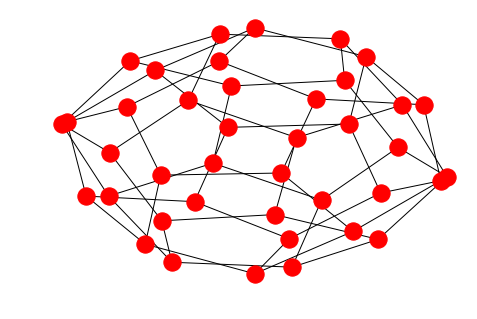

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
G=nx.dodecahedral_graph(copurchaseGraph)
nx.draw(G)
nx.draw(G,pos=nx.spring_layout(G))
plt.draw()

In [20]:
amazonBooks

{'0827229534': {'Id': '1',
  'Title': 'Patterns of Preaching: A Sermon Sampler',
  'Categories': 'subject clergi spiritu book sermon preach religion christian',
  'Group': 'Book',
  'Copurchased': '0804215715 156101074X 0687023955 0687074231 082721619X',
  'SalesRank': 396585,
  'TotalReviews': 2,
  'AvgRating': 5.0,
  'DegreeCentrality': 8,
  'ClusteringCoeff': 0.8},
 '0738700797': {'Id': '2',
  'Title': 'Candlemas: Feast of Flames',
  'Categories': 'earth subject wicca witchcraft spiritu book religion base',
  'Group': 'Book',
  'Copurchased': '0738700827 1567184960 1567182836 0738700525 0738700940',
  'SalesRank': 168596,
  'TotalReviews': 12,
  'AvgRating': 4.5,
  'DegreeCentrality': 9,
  'ClusteringCoeff': 0.85},
 '0486287785': {'Id': '3',
  'Title': 'World War II Allied Fighter Planes Trading Cards',
  'Categories': 'subject book garden craft hobbi general home',
  'Group': 'Book',
  'Copurchased': '',
  'SalesRank': 1270652,
  'TotalReviews': 1,
  'AvgRating': 5.0,
  'DegreeCent

In [ ]:


copurchaseGraph.add_node(a.strip())
        similarity = 0
        n1 = set((amazonMusic[asin]['Categories']).split())
        n2 = set((amazonMusic[a]['Categories']).split())
        intersection = n1.interection(n2)
        union = n1.union(n2)
        if(len(n12)) > 0:
            similarity = round(len(n1.intersection(n2)/len(n1.union(n2)), 2)
        copurchaseGraph.add_edge(asin, a.strip(), weight=similarity)
                               
                               
                               
                               
                               
                               
                               
